<a href="https://colab.research.google.com/github/Siddharth131020/Machine-learning/blob/main/Fish_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset = pd.read_csv('/content/Fish.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
x=dataset.iloc[:,[2,3,4,5,6]].values
y=dataset.iloc[:,1].values

In [7]:
print(f"{x.shape} {y.shape}")


(159, 5) (159,)


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 98)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((119, 5), (40, 5), (119,), (40,))

In [9]:
u = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)
print(u.shape, std.shape)

(5,) (5,)


In [10]:
x_train = (x_train - u)/std
x_test = (x_test-u)/std
x_train = np.array(x_train)
x_test = np.array(x_test)

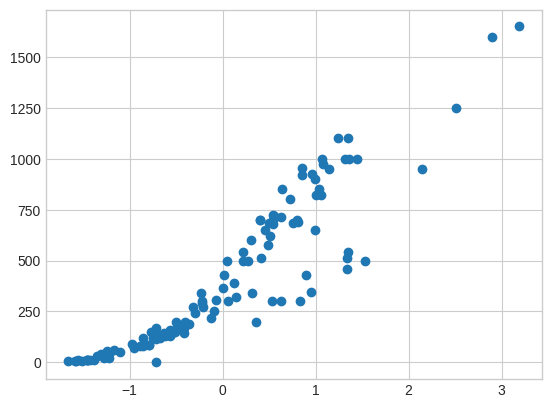

In [11]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.scatter(x_train[:, 0], y_train)
plt.show()

In [12]:
plt.style.available?

In [13]:
ones = np.ones((x_train.shape[0], 1))
x_train = np.hstack((ones, x_train))
print(x_train[:4, :])

[[ 1.         -1.17034869 -1.17618259 -1.16928945 -0.56168929 -1.17947165]
 [ 1.          2.89689784  2.86277397  2.73731239  0.12001404  1.00553814]
 [ 1.          2.1458715   2.1094405   1.99120174 -0.03194166  1.02105652]
 [ 1.          0.36096475  0.34863696  0.28939879 -0.78928457 -0.57391277]]


In [14]:
def hypothesis(x, theta):
    return np.dot(x, theta)

In [15]:
def cost(X, Y, theta):
    m = X.shape[0]
    total_error = 0

    y_p = hypothesis(X, theta)
    total_error = np.sum((y_p - Y)**2)

    return total_error/m

In [16]:
def gradient(X, Y, theta):

    y_p = hypothesis(X, theta)

    grad = np.dot(X.T, (y_p - Y))

    return grad/X.shape[0]

In [17]:
def gradient_descent(X, Y, learning_rate = 0.001, max_steps = 500):

    m, n = X.shape
    theta = np.zeros((n, ))
    cost_epoch = []

    for i in range(max_steps):

        grad = gradient(X, Y, theta)

        e = cost(X, Y, theta)
        cost_epoch.append(e)

        theta = theta - learning_rate*grad

    return theta, cost_epoch

In [18]:
theta, cost_epoch = gradient_descent(x_train, y_train, learning_rate=0.3)


In [19]:
theta


array([403.8       , 158.12079842,  96.78880738, -33.85217645,
        60.55764743,  83.82519858])

In [20]:
cost_epoch


[296082.73579831934,
 107706.65377404049,
 55967.09342977132,
 34841.10518820647,
 24926.179851194243,
 20110.058604256985,
 17751.702669482882,
 16593.804520750087,
 16024.032950432975,
 15742.670799674695,
 15602.841630738878,
 15532.53791960057,
 15496.444607547983,
 15477.233309926365,
 15466.39477571631,
 15459.745323541581,
 15455.22390031698,
 15451.81183856078,
 15449.002951910647,
 15446.543453705855,
 15444.304203453858,
 15442.217877414341,
 15440.248012809618,
 15438.373714446001,
 15436.582068263673,
 15434.864354905669,
 15433.2141425713,
 15431.626313371484,
 15430.096556385868,
 15428.62109623664,
 15427.196542109768,
 15425.819799534882,
 15424.48801570323,
 15423.198543308748,
 15421.94891504449,
 15420.736824524618,
 15419.560111283708,
 15418.416748499285,
 15417.304832623126,
 15416.222574409972,
 15415.168291008704,
 15414.140398888205,
 15413.137407437687,
 15412.15791312548,
 15411.20059413033,
 15410.264205379623,
 15409.347573944142,
 15408.449594749041,
 1540

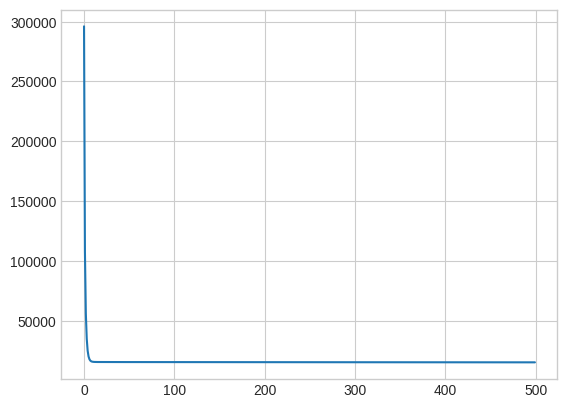

In [21]:
plt.plot(cost_epoch)
plt.show()

In [22]:
ones = np.ones((x_test.shape[0], 1))
x_test = np.hstack((ones, x_test))
print(x_test[:4, :4], x_test.shape)

[[ 1.          0.70234036  0.77522339  0.94329352]
 [ 1.         -0.70217643 -0.69513833 -0.69144331]
 [ 1.          1.80449589  1.77361715  1.66425437]
 [ 1.          0.3121968   0.29417912  0.30616532]] (40, 6)


In [23]:
y_pred_test = []

for i in range(x_test.shape[0]):
    pred = hypothesis(x_test[i], theta)
    y_pred_test.append(pred)

y_pred_test = np.array(y_pred_test)

In [24]:
for i in range(len(y_pred_test)):
    print(y_pred_test[i], y_test[i])

799.2522058155448 1000.0
162.14235754398018 110.0
833.0624302230169 770.0
523.5266849305171 390.0
240.9642463371867 161.0
384.9949794276165 272.0
-178.47359104958733 9.8
-235.5577255632237 5.9
810.9169982796097 900.0
205.27904474440905 110.0
184.40615132217414 120.0
642.3388455599245 556.0
358.6954899678161 265.0
267.0132748373318 180.0
831.4423334041926 1015.0
106.84622564866662 85.0
736.3428933245291 840.0
775.2419080278557 567.0
355.7401757695523 290.0
87.43378729057952 100.0
360.27423804203846 260.0
702.9646789271677 700.0
584.262715353717 600.0
500.94920764000307 450.0
550.263034814889 475.0
185.20553930056175 120.0
293.5290561406172 180.0
332.2929187148882 270.0
202.82708086085051 140.0
165.18849930613865 110.0
306.8023740938979 197.0
92.47338003536532 78.0
373.62421055917554 250.0
624.0987040167039 610.0
1137.8374987187776 1550.0
516.2862543094627 450.0
542.5228984303918 500.0
259.18920628217774 225.0
410.154834628203 300.0
49.59604651865128 70.0


In [25]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print("Accuracy: ", metrics.explained_variance_score(y_test, y_pred_test))

MAE: 93.38861920874474
MSE: 14489.872689567297
RMSE: 120.37388707509324
Accuracy:  0.8719974777753976


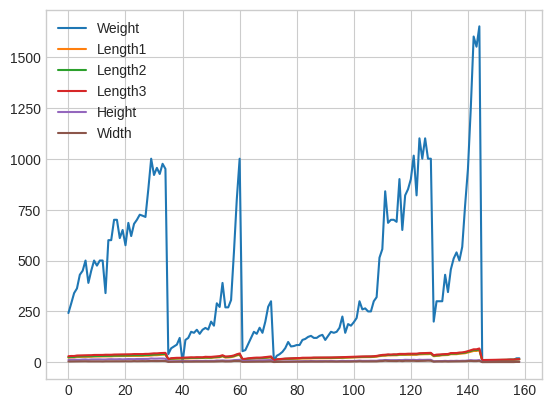

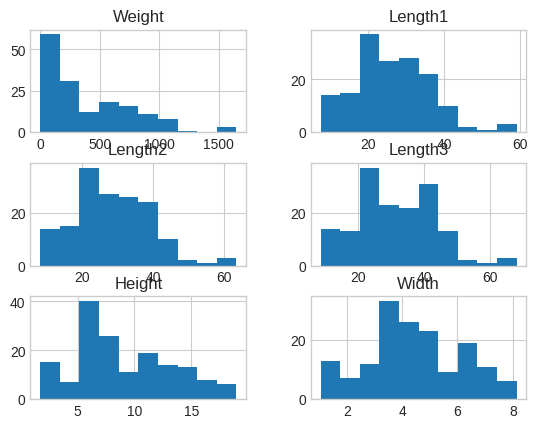

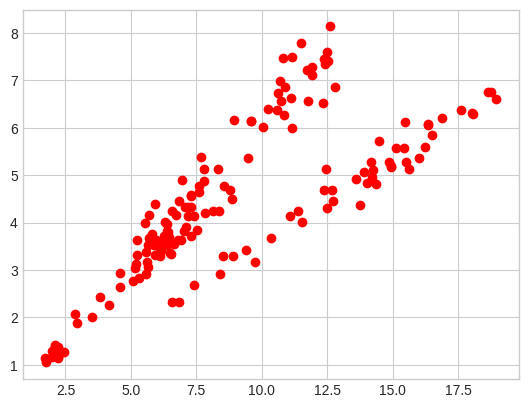

In [26]:
dataset.plot()
dataset.hist()
plt.show()
plt.scatter(dataset["Height"],dataset["Width"],color="red")